# This notebook contains some analysis of flight delay patterns and attempts to connect weather data to the cause of the delays.

#### efforts are focused on JFK and LaGuardia airports in NYC.  In contrast to the previous notebooks, flight data is looked at for the entire year of 2015.

In [21]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df_2015 = pd.read_csv('./data/363985671_T_ONTIME_July2015.zip')

In [23]:
df_2015.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID',
       u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR', u'DEST_STATE_NM',
       u'CRS_DEP_TIME', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'TAXI_OUT', u'WHEELS_OFF', u'WHEELS_ON', u'TAXI_IN', u'CRS_ARR_TIME',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'DISTANCE', u'CARRIER_DELAY',
       u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'FIRST_DEP_TIME', u'TOTAL_ADD_GTIME',
       u'LONGEST_ADD_GTIME', u'Unnamed: 48'],
      dtype='object')

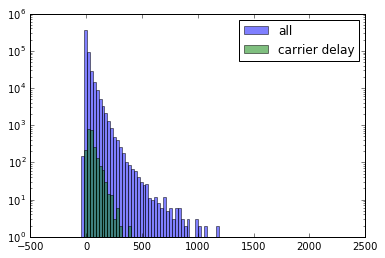

In [24]:
#df_2015.hist('DEP_DELAY',bins=100,color='b')
#df_2015[df_2015.CARRIER_DELAY==1].hist('DEP_DELAY',bins=100,color='r')

bins = np.linspace(-100, 2500, 100)

plt.hist(df_2015['DEP_DELAY'], bins, alpha=0.5, label='all',log=True)
plt.hist(df_2015[df_2015.CARRIER_DELAY==1]['DEP_DELAY'], bins, alpha=0.5, label='carrier delay')
plt.legend(loc='upper right')
plt.show()

In [25]:
print df_2015[df_2015.ORIGIN_CITY_NAME=='New York, NY']['ORIGIN_AIRPORT_ID'].unique()

[12478 12953]


In [26]:
df_airport_codes = pd.read_csv('./data/L_AIRPORT_ID.csv-')
#df_airport_codes['Description'] = df_airport_codes['Description'].apply(lambda x: x.split(':')[1].strip())
#df_airport_codes[df_airport_codes.Description=='LaGuardia']
#df_airport_codes = df_airport_codes.merge(df_airports,left_on='Description',right_on='airport')
print df_airport_codes[df_airport_codes.Code==12478]
print df_airport_codes[df_airport_codes.Code==12953]

       Code                                  Description
2381  12478  New York, NY: John F. Kennedy International
       Code              Description
2824  12953  New York, NY: LaGuardia


In [27]:
temp = df_2015[df_2015.DEP_DELAY>0][df_2015.ORIGIN_CITY_NAME=='New York, NY'].groupby(['DAY_OF_MONTH','ORIGIN_AIRPORT_ID'])['DEP_DELAY'].count()
temp.head()

C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


DAY_OF_MONTH  ORIGIN_AIRPORT_ID
1             12478                131
              12953                116
2             12478                102
              12953                103
3             12478                 82
Name: DEP_DELAY, dtype: int64

In [28]:
temp.head().index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [12478, 12953]],
           labels=[[0, 0, 1, 1, 2], [0, 1, 0, 1, 0]],
           names=[u'DAY_OF_MONTH', u'ORIGIN_AIRPORT_ID'])

In [29]:
delays_12478_JFK_df = df_2015[df_2015.DEP_DELAY>0][df_2015.CARRIER_DELAY==1][df_2015.ORIGIN_CITY_NAME=='New York, NY'][df_2015.ORIGIN_AIRPORT_ID==12478].groupby('DAY_OF_MONTH')['DEP_DELAY'].count()
delays_12953_LAG_df = df_2015[df_2015.DEP_DELAY>0][df_2015.CARRIER_DELAY==1][df_2015.ORIGIN_CITY_NAME=='New York, NY'][df_2015.ORIGIN_AIRPORT_ID==12953].groupby('DAY_OF_MONTH')['DEP_DELAY'].count()

C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [30]:
print delays_12478_JFK

NameError: name 'delays_12478_JFK' is not defined

In [31]:
delays_12478_JFK = delays_12478_JFK_df.values
delays_12953_LAG = delays_12953_LAG_df.values

In [32]:
days_JFK = delays_12478_JFK_df.index.values
days_LAG = delays_12953_LAG_df.index.values

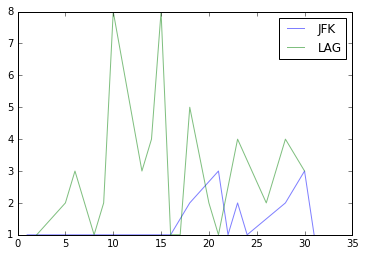

In [33]:
plt.plot(days_JFK, delays_12478_JFK, alpha=0.5, label='JFK')
plt.plot(days_LAG, delays_12953_LAG, alpha=0.5, label='LAG')
plt.legend(loc='upper right')
plt.show()

In [34]:
frames = [ pd.read_csv('./data/791693465_T_ONTIME_'+str(i)+'_2015.zip') for i in xrange(1,13) ]
df_ny_2015 = pd.concat(frames, ignore_index=True)
    

In [35]:
df_ny_2015 = df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID.isin([12953,12478])]
df_ny_2015.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,Unnamed: 49
0,2015,1,1,4,2015-01-01,AA,19805,AA,12478,1247802,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,5,2015-01-02,AA,19805,AA,12478,1247802,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,3,6,2015-01-03,AA,19805,AA,12478,1247802,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,4,7,2015-01-04,AA,19805,AA,12478,1247802,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,5,1,2015-01-05,AA,19805,AA,12478,1247802,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_ny_2015.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'UNIQUE_CARRIER', u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID',
       u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR', u'DEST_STATE_NM',
       u'CRS_DEP_TIME', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'TAXI_OUT', u'WHEELS_OFF', u'WHEELS_ON', u'TAXI_IN', u'CRS_ARR_TIME',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'FLIGHTS', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'FIRST_DEP_TIME', u'TOTAL_ADD_GTIME',
       u'Unnamed: 49'],
      dtype='object')

In [37]:
df_delays_all_jfk = df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12478][df_ny_2015.DEP_DELAY>0][df_ny_2015.CARRIER_DELAY==1].groupby('FL_DATE')['DEP_DELAY'].count()
df_delays_all_lag = df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12953][df_ny_2015.DEP_DELAY>0][df_ny_2015.CARRIER_DELAY==1].groupby('FL_DATE')['DEP_DELAY'].count()

C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [38]:
delays_values_jfk = df_delays_all_jfk.values
delays_values_lag = df_delays_all_lag.values

days_jfk = df_delays_all_jfk.index.values
days_lag = df_delays_all_lag.index.values


print len(days_jfk)
print len(days_lag)

167
220


C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


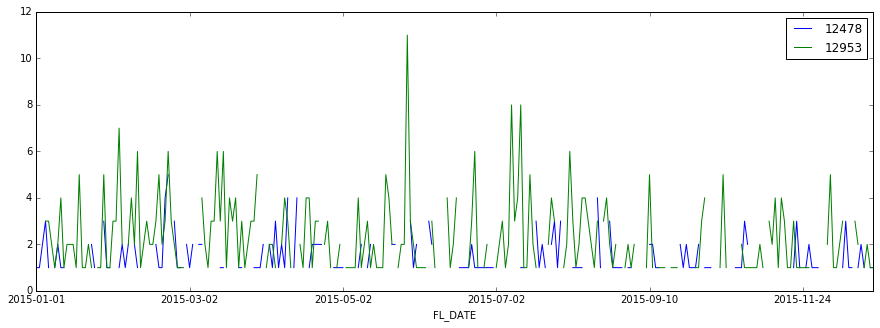

In [39]:
plt.figure(figsize=(25,5))
df_ny_2015[df_ny_2015.DEP_DELAY>0][df_ny_2015.CARRIER_DELAY==1][df_ny_2015.ORIGIN_AIRPORT_ID.isin([12953,12478])].groupby(['FL_DATE','ORIGIN_AIRPORT_ID'])['DEP_DELAY'].count().unstack().plot(figsize=(15,5))
#df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12953][df_ny_2015.DEP_DELAY>0][df_ny_2015.CARRIER_DELAY==1].groupby(['FL_DATE','ORIGIN_AIRPORT_ID'])['DEP_DELAY'].count().plot(ax=ax,label='lag')
plt.legend()

In [40]:
df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12478][df_ny_2015.DEP_DELAY>0][df_ny_2015.CARRIER_DELAY==1].groupby('FL_DATE')['DEP_DELAY'].count()

C:\Users\Rich\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


FL_DATE
2015-01-01    1
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    1
2015-01-08    1
2015-01-09    2
2015-01-12    1
2015-01-13    1
2015-01-16    1
2015-01-19    1
2015-01-24    2
2015-01-25    1
2015-01-30    3
2015-01-31    1
2015-02-02    1
2015-02-05    1
2015-02-08    2
2015-02-09    1
2015-02-10    2
2015-02-12    2
2015-02-13    1
2015-02-17    4
2015-02-19    2
2015-02-20    1
2015-02-21    1
2015-02-22    4
2015-02-23    5
2015-02-25    3
2015-02-26    1
             ..
2015-10-21    1
2015-10-22    1
2015-10-23    1
2015-10-24    3
2015-10-25    2
2015-11-02    1
2015-11-05    1
2015-11-10    3
2015-11-12    1
2015-11-15    1
2015-11-19    1
2015-11-20    3
2015-11-22    1
2015-11-29    1
2015-12-01    2
2015-12-02    1
2015-12-03    1
2015-12-04    1
2015-12-11    1
2015-12-14    2
2015-12-16    1
2015-12-18    1
2015-12-19    3
2015-12-20    1
2015-12-21    1
2015-12-24    1
2015-12-25    2
2015-12-26    1
2015-12-29    1
2015-12-30    1
Name: DEP_DELAY,

#### Below shows the number of flights per day over the year 2015 for JFK.  The characteristic weekly pattern can be seen.

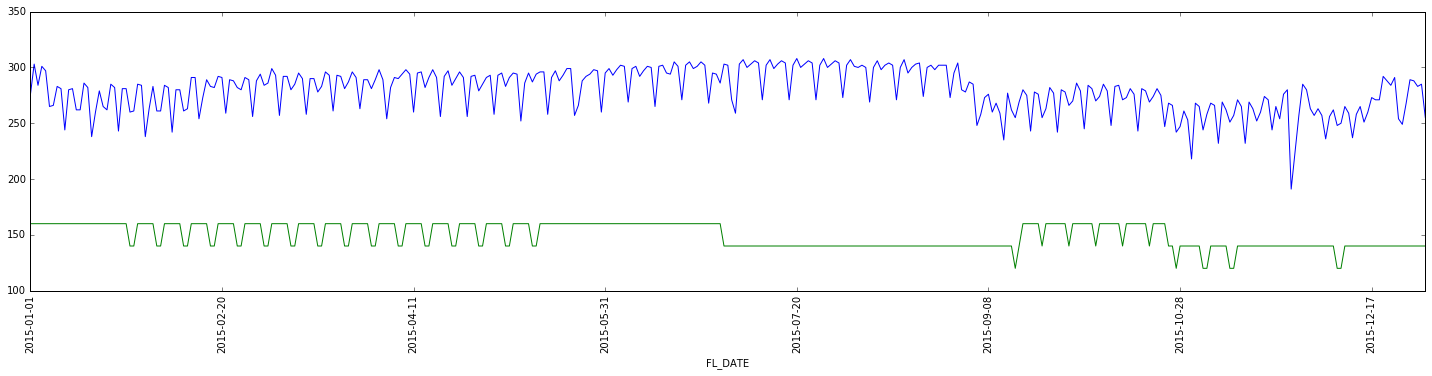

In [43]:
plt.figure(figsize=(25,5))
df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12478].groupby('FL_DATE')['ORIGIN'].count().plot(use_index=True)
df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12478].groupby('FL_DATE')['CARRIER'].unique().apply(lambda x: 20.*len(x)).plot(use_index=True, sharex=True)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
df_ny_2015[df_ny_2015.ORIGIN_AIRPORT_ID==12478].groupby('FL_DATE')['CARRIER'].unique().apply(lambda x: len(x))

FL_DATE
2015-01-01    8
2015-01-02    8
2015-01-03    8
2015-01-04    8
2015-01-05    8
2015-01-06    8
2015-01-07    8
2015-01-08    8
2015-01-09    8
2015-01-10    8
2015-01-11    8
2015-01-12    8
2015-01-13    8
2015-01-14    8
2015-01-15    8
2015-01-16    8
2015-01-17    8
2015-01-18    8
2015-01-19    8
2015-01-20    8
2015-01-21    8
2015-01-22    8
2015-01-23    8
2015-01-24    8
2015-01-25    8
2015-01-26    8
2015-01-27    7
2015-01-28    7
2015-01-29    8
2015-01-30    8
             ..
2015-12-02    7
2015-12-03    7
2015-12-04    7
2015-12-05    7
2015-12-06    7
2015-12-07    7
2015-12-08    6
2015-12-09    6
2015-12-10    7
2015-12-11    7
2015-12-12    7
2015-12-13    7
2015-12-14    7
2015-12-15    7
2015-12-16    7
2015-12-17    7
2015-12-18    7
2015-12-19    7
2015-12-20    7
2015-12-21    7
2015-12-22    7
2015-12-23    7
2015-12-24    7
2015-12-25    7
2015-12-26    7
2015-12-27    7
2015-12-28    7
2015-12-29    7
2015-12-30    7
2015-12-31    7
Name: CARRIER, d

#### Load in weather data from NOAA collected by a weather station at JFK.

In [45]:
weather_df = pd.read_csv('../../../Github/CitiBikeApp/data/jfk_temp_data.txt')

In [46]:
weather_df['Date'] = weather_df['Date'].apply(lambda x: str(x))
weather_df['Date'] = weather_df['Date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:])
weather_df.head()

,USAF,NCDC.,Date,HrMn,I,Type,QCP,Temp,Q
0,744860,94789,2013-07-01,0,4,FM-12,,23.3,1
1,744860,94789,2013-07-01,49,6,FM-16,,23.0,5
2,744860,94789,2013-07-01,51,7,FM-15,,22.8,5
3,744860,94789,2013-07-01,105,7,FM-16,,23.0,5
4,744860,94789,2013-07-01,151,7,FM-15,,22.2,5


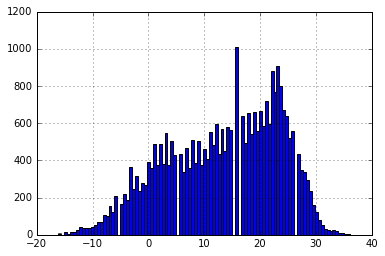

In [47]:
weather_df['Temp'].hist(bins=100)

In [48]:
df_avg_daily_temp = weather_df.groupby('Date')['Temp'].mean()

In [49]:
df_avg_daily_temp.to_frame().head()

,Temp
Date,
2013-07-01,22.808475
2013-07-02,22.888000
2013-07-03,23.530556
2013-07-04,25.092500
2013-07-05,25.981250


In [50]:
temp = df_ny_2015.merge(df_avg_daily_temp.to_frame(), left_on='FL_DATE',right_index=True)
#temp = df_ny_2015.merge(df_avg_daily_temp, left_on='FL_DATE')
temp.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,Unnamed: 49,Temp
0,2015,1,1,4,2015-01-01,AA,19805,AA,12478,1247802,...,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41875
62,2015,1,1,4,2015-01-01,AA,19805,AA,12478,1247802,...,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41875
124,2015,1,1,4,2015-01-01,AA,19805,AA,12478,1247802,...,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41875
217,2015,1,1,4,2015-01-01,AA,19805,AA,12478,1247802,...,2586.0,0.0,0.0,48.0,0.0,0.0,NaN,NaN,NaN,0.41875
304,2015,1,1,4,2015-01-01,AA,19805,AA,12478,1247802,...,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41875


In [51]:
#plt.plot(range(len(temp.Temp)),temp.Temp)
#plt.xticks(range(len(temp.Temp)),temp.FL_DATE)
temp.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'UNIQUE_CARRIER', u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID',
       u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR', u'DEST_STATE_NM',
       u'CRS_DEP_TIME', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'TAXI_OUT', u'WHEELS_OFF', u'WHEELS_ON', u'TAXI_IN', u'CRS_ARR_TIME',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'FLIGHTS', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'FIRST_DEP_TIME', u'TOTAL_ADD_GTIME',
       u'Unnamed: 49', u'Temp'],
      dtype='object')

#### There does NOT seem to be a strong correlation of departure delays and temperature.  My original idea was to try and look evidence of increased delays due to temperature (not characterized by the data already as originated from a weather delay.  Whether or not this class of delays is included does not make much of a difference in terms of the delay length correlating to temperature alone.

In [52]:
temp = temp[temp.WEATHER_DELAY==1]
temp['DEP_DELAY'].corr(temp['Temp'])

0.043919364540865653

In [53]:
frames = [ pd.read_csv('./data/145558103_T_ONTIME_July_'+str(i)+'.zip') for i in [2006, 2007, 2008, 2009, 2010] ]
df = pd.concat(frames, ignore_index=True)

In [54]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,Unnamed: 49
0,2006,7,1,6,2006-07-01,AA,19805,AA,12478,1247801,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,7,2,7,2006-07-02,AA,19805,AA,12478,1247801,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006,7,3,1,2006-07-03,AA,19805,AA,12478,1247801,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006,7,4,2,2006-07-04,AA,19805,AA,12478,1247801,...,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,7,5,3,2006-07-05,AA,19805,AA,12478,1247801,...,1.0,2475.0,13.0,0.0,87.0,0.0,0.0,NaN,NaN,NaN


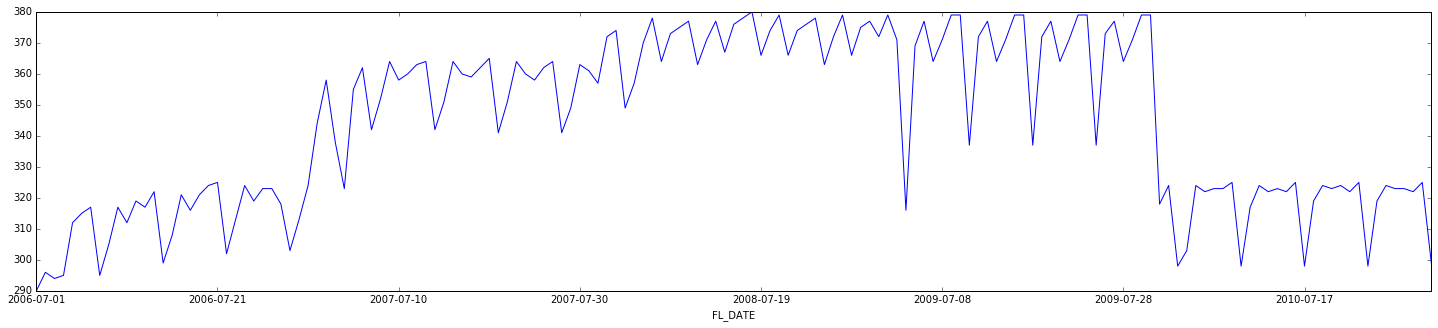

In [55]:
plt.figure(figsize=(25,5))
df[df.ORIGIN_AIRPORT_ID==12478].groupby('FL_DATE')['ORIGIN'].count().plot(use_index=True)